## UE19CS345 : Network Analysis and Mining

1.   PES1UG19CS012 : Abhijit Sethi
2.   PES1UG19CS015 : Abhijnya Bhat
3.   PES1UG19CS427 : Sammith S Bharadwaj
4.   PES1UG19CS444 : Shamath K M




## Importing Libraries

In [ ]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from operator import itemgetter
import community
import community.community_louvain as community_louvain
# import pygraphviz

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load data file from drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# Reading "Death on the Nile" novel text file
with open('./Nile.txt', 'r') as file:
    Nile = file.read()

## Preprocessing

In [ ]:
Nile = ''.join([i for i in Nile if not i.isdigit()])

In [ ]:
# Changing different charecters name to uniform names.
Nile=Nile.lower()
Nile = Nile.replace('\n\n', '\n')
Nile = Nile.replace('hercule poirot', 'hercule_poirot')
Nile = Nile.replace('hercule ', 'hercule_poirot')
Nile = Nile.replace(' poirot', 'hercule_poirot')

Nile = Nile.replace('linnet doyle', 'linnet')
Nile = Nile.replace('linnet ridgeway', 'linnet')
Nile = Nile.replace('madame linnet', 'linnet')

Nile = Nile.replace('simon doyle ', 'simon')
Nile = Nile.replace('mr doyle ', 'simon')

Nile = Nile.replace('colonel race ', 'race')
Nile = Nile.replace('colonel', 'race')

Nile = Nile.replace('andrew pennington', 'pennington')
Nile = Nile.replace('andrew', 'pennington')

Nile = Nile.replace('salome otterbourne', 'salome')
Nile = Nile.replace('mrs otterbourne', 'salome')

Nile = Nile.replace('rosalie otterbourne', 'rosalie')

Nile = Nile.replace('mrs allerton', 'mrs_allerton')

Nile = Nile.replace('tim allerton', 'tim')

Nile = Nile.replace('miss van schuyler', 'schuyler')
Nile = Nile.replace('van schuyler', 'schuyler')

Nile = Nile.replace('cornelia robson', 'cornelia')
Nile = Nile.replace('robson', 'cornelia')

Nile = Nile.replace('lord dawlish', 'ferguson')

Nile = Nile.replace('signor richetti', 'richetti')
Nile = Nile.replace('signor', 'richetti')


Nile = Nile.replace('louise bourget', 'louise')
Nile = Nile.replace('bourget', 'louise')

Nile = Nile.replace('james fanthorp', 'fanthorp')
Nile = Nile.replace('james', 'fanthorp')

Nile = Nile.replace('joanna southwood', 'joanna')
Nile = Nile.replace('southwood', 'joanna')
Nile = Nile.replace('jackie', 'jacqueline')

Nile = Nile.replace('sterndale rockford', 'rockford')

In [ ]:
nltk.download('punkt')
sentences = sent_tokenize(Nile)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Implementation 


## Task (a)
### Making a list of characters from the novel "Death on the Nile"

In [ ]:
characters=['hercule_poirot','jacqueline','linnet', 'simon', 'race', 'pennington', 'salome', 'rosalie', 'mrs_allerton', 'tim', 'schuyler', 'ferguson', 'richetti', 'cornelia', 'bowers', 'louise', 'fanthorp', 'joanna', 'fleetwood','rockford']

## Task (b)

### Matrix implementation of social graph

In [ ]:
char_df = pd.DataFrame(0, index=characters, columns=characters)
for sentence in sentences:
    for char1 in characters:
        for char2 in characters:
            if (char1 != char2) and char1 in sentence and char2 in sentence:
                char_df[char1][char2] += 1
                char_df[char2][char1] += 1

char_df.head()

,hercule_poirot,jacqueline,linnet,simon,race,pennington,salome,rosalie,mrs_allerton,tim,schuyler,ferguson,richetti,cornelia,bowers,louise,fanthorp,joanna,fleetwood,rockford
hercule_poirot,0,28,32,26,62,6,4,18,14,46,20,8,2,10,10,6,6,2,2,0
jacqueline,28,0,44,64,4,4,0,8,0,16,2,0,0,26,10,2,12,2,0,0
linnet,32,44,0,44,12,30,0,2,0,26,4,0,2,4,0,8,2,12,6,2
simon,26,64,44,0,10,8,0,0,8,16,0,0,2,14,4,4,14,0,0,0
race,62,4,12,10,0,24,2,8,0,22,6,10,0,6,16,2,8,0,0,0


### Graph plot

In [ ]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

In [ ]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 20
Nodes: ['hercule_poirot', 'jacqueline', 'linnet', 'simon', 'race', 'pennington', 'salome', 'rosalie', 'mrs_allerton', 'tim', 'schuyler', 'ferguson', 'richetti', 'cornelia', 'bowers', 'louise', 'fanthorp', 'joanna', 'fleetwood', 'rockford']

Number of edges in the graph: 121
Edges: [('hercule_poirot', 'jacqueline', {'weight': 28}), ('hercule_poirot', 'linnet', {'weight': 32}), ('hercule_poirot', 'simon', {'weight': 26}), ('hercule_poirot', 'race', {'weight': 62}), ('hercule_poirot', 'pennington', {'weight': 6}), ('hercule_poirot', 'salome', {'weight': 4}), ('hercule_poirot', 'rosalie', {'weight': 18}), ('hercule_poirot', 'mrs_allerton', {'weight': 14}), ('hercule_poirot', 'tim', {'weight': 46}), ('hercule_poirot', 'schuyler', {'weight': 20}), ('hercule_poirot', 'ferguson', {'weight': 8}), ('hercule_poirot', 'richetti', {'weight': 2}), ('hercule_poirot', 'cornelia', {'weight': 10}), ('hercule_poirot', 'bowers', {'weight': 10}), ('hercule_poirot', 'louise'

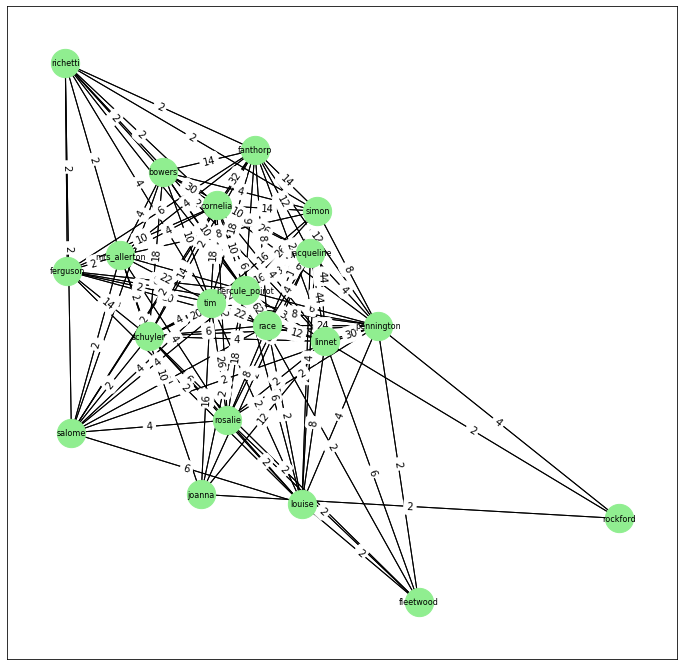

In [ ]:
plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="lightgreen")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

## Task (c)

Main Protagonists : Hercule Poirot, Linnet, Simon, Jacqueline

### Degree centrality

In [ ]:
degc = nx.degree_centrality(G)
print('Hercule Poirot : ', degc['hercule_poirot'])
print('Linnet : ', degc['linnet'])
print('Simon : ', degc['simon'])
print('Jacqueline : ', degc['jacqueline'])

Hercule Poirot :  0.9473684210526315
Linnet :  0.7894736842105263
Simon :  0.631578947368421
Jacqueline :  0.6842105263157894


In [ ]:
degc = nx.degree_centrality(G)
# Degree Centrality for all characters
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('hercule_poirot', 0.9473684210526315),
 ('tim', 0.894736842105263),
 ('linnet', 0.7894736842105263),
 ('pennington', 0.7894736842105263),
 ('schuyler', 0.7894736842105263),
 ('cornelia', 0.7894736842105263),
 ('race', 0.7368421052631579),
 ('fanthorp', 0.7368421052631579),
 ('jacqueline', 0.6842105263157894),
 ('simon', 0.631578947368421),
 ('salome', 0.631578947368421),
 ('rosalie', 0.631578947368421),
 ('mrs_allerton', 0.631578947368421),
 ('louise', 0.631578947368421),
 ('bowers', 0.5789473684210527),
 ('ferguson', 0.5263157894736842),
 ('richetti', 0.5263157894736842),
 ('joanna', 0.3157894736842105),
 ('fleetwood', 0.3157894736842105),
 ('rockford', 0.15789473684210525)]

### Betweenness centrality

In [ ]:
bet = nx.betweenness_centrality(G)
print('Hercule Poirot : ', bet['hercule_poirot'])
print('Linnet : ', bet['linnet'])
print('Simon : ', bet['simon'])
print('Jacqueline : ', bet['jacqueline'])

Hercule Poirot :  0.05769706252162393
Linnet :  0.06944697602592338
Simon :  0.010343409027619552
Jacqueline :  0.017949545581124524


In [ ]:
bet = nx.betweenness_centrality(G)
# Betweenness Centrality for all characters
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('linnet', 0.06944697602592338),
 ('pennington', 0.06096048201311359),
 ('hercule_poirot', 0.05769706252162393),
 ('tim', 0.03732669215125355),
 ('schuyler', 0.026125920862762966),
 ('mrs_allerton', 0.020339358497253233),
 ('jacqueline', 0.017949545581124524),
 ('cornelia', 0.01653481346463802),
 ('joanna', 0.014058715813101776),
 ('louise', 0.0132996632996633),
 ('fanthorp', 0.012863598389914178),
 ('rosalie', 0.012283233335864913),
 ('race', 0.012111929655789302),
 ('simon', 0.010343409027619552),
 ('salome', 0.010233074268161987),
 ('ferguson', 0.006191615402141717),
 ('richetti', 0.005350286490637368),
 ('bowers', 0.005070757702336649),
 ('rockford', 0.0011695906432748538),
 ('fleetwood', 0.0)]

### Closeness centrality

In [ ]:
clos = nx.closeness_centrality(G)
print('Hercule Poirot : ', clos['hercule_poirot'])
print('Linnet : ', clos['linnet'])
print('Simon : ', clos['simon'])
print('Jacqueline : ', clos['jacqueline'])

Hercule Poirot :  0.95
Linnet :  0.8260869565217391
Simon :  0.7307692307692307
Jacqueline :  0.76


In [ ]:
clos = nx.closeness_centrality(G)
# Closeness Centrality for all characters
sorted(clos.items(), key=itemgetter(1), reverse=True)

[('hercule_poirot', 0.95),
 ('tim', 0.9047619047619048),
 ('linnet', 0.8260869565217391),
 ('pennington', 0.8260869565217391),
 ('schuyler', 0.8260869565217391),
 ('cornelia', 0.8260869565217391),
 ('race', 0.7916666666666666),
 ('fanthorp', 0.7916666666666666),
 ('jacqueline', 0.76),
 ('simon', 0.7307692307692307),
 ('salome', 0.7307692307692307),
 ('rosalie', 0.7307692307692307),
 ('mrs_allerton', 0.7307692307692307),
 ('louise', 0.7307692307692307),
 ('ferguson', 0.6785714285714286),
 ('richetti', 0.6785714285714286),
 ('bowers', 0.6785714285714286),
 ('joanna', 0.59375),
 ('fleetwood', 0.59375),
 ('rockford', 0.5277777777777778)]

### Pagerank centrality

In [ ]:
pgr=nx.pagerank(G)
print('Hercule Poirot : ', pgr['hercule_poirot'])
print('Linnet : ', pgr['linnet'])
print('Simon : ', pgr['simon'])
print('Jacqueline : ', pgr['jacqueline'])

Hercule Poirot :  0.11121363857839073
Linnet :  0.0889626677943689
Simon :  0.07773224990952528
Jacqueline :  0.07984622308418783


In [ ]:
from operator import itemgetter
s='\n sorted pagerank:\n'
print (s)
pgr=nx.pagerank(G)
print (sorted(pgr.items(), key=itemgetter(1), reverse=True))



 sorted pagerank:

[('hercule_poirot', 0.11121363857839073), ('tim', 0.09869999478285556), ('linnet', 0.0889626677943689), ('jacqueline', 0.07984622308418783), ('simon', 0.07773224990952528), ('race', 0.07236402488874877), ('cornelia', 0.06876828333163425), ('fanthorp', 0.052882619951006106), ('pennington', 0.05100331734898204), ('bowers', 0.04802586412066228), ('schuyler', 0.043797961964573), ('rosalie', 0.03670000931080348), ('mrs_allerton', 0.035311874541191945), ('ferguson', 0.027855705720416707), ('joanna', 0.023936068503672053), ('louise', 0.023371264594246516), ('salome', 0.020424321415365203), ('richetti', 0.01529980074701185), ('fleetwood', 0.013252184041688257), ('rockford', 0.010551925370669426)]


In [ ]:
print(nx.transitivity(G))

0.7393364928909952


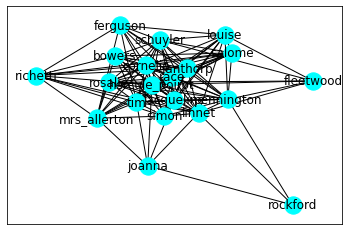

In [ ]:
nx.draw_networkx(G,node_color='cyan')

## Task (d)

### Clustering coefficient

In [ ]:
print(nx.clustering(G))

{'hercule_poirot': 0.6535947712418301, 'jacqueline': 0.7692307692307693, 'linnet': 0.6190476190476191, 'simon': 0.7878787878787878, 'race': 0.8021978021978022, 'pennington': 0.6761904761904762, 'salome': 0.7878787878787878, 'rosalie': 0.7878787878787878, 'mrs_allerton': 0.696969696969697, 'tim': 0.6985294117647058, 'schuyler': 0.7333333333333333, 'ferguson': 0.8, 'richetti': 0.8222222222222222, 'cornelia': 0.7714285714285715, 'bowers': 0.8545454545454545, 'louise': 0.7575757575757576, 'fanthorp': 0.7912087912087912, 'joanna': 0.6, 'fleetwood': 1.0, 'rockford': 0.6666666666666666}


In [ ]:
print(nx.clustering(G, ['hercule_poirot']))
print(nx.clustering(G, ['simon']))
print(nx.clustering(G, ['linnet']))
print(nx.clustering(G, ['jacqueline']))

{'hercule_poirot': 0.6535947712418301}
{'simon': 0.7878787878787878}
{'linnet': 0.6190476190476191}
{'jacqueline': 0.7692307692307693}


In [ ]:
#local clustering needs to be done
sorted(nx.clustering(G).items(), key = itemgetter(1), reverse = True)

[('fleetwood', 1.0),
 ('bowers', 0.8545454545454545),
 ('richetti', 0.8222222222222222),
 ('race', 0.8021978021978022),
 ('ferguson', 0.8),
 ('fanthorp', 0.7912087912087912),
 ('simon', 0.7878787878787878),
 ('salome', 0.7878787878787878),
 ('rosalie', 0.7878787878787878),
 ('cornelia', 0.7714285714285715),
 ('jacqueline', 0.7692307692307693),
 ('louise', 0.7575757575757576),
 ('schuyler', 0.7333333333333333),
 ('tim', 0.6985294117647058),
 ('mrs_allerton', 0.696969696969697),
 ('pennington', 0.6761904761904762),
 ('rockford', 0.6666666666666666),
 ('hercule_poirot', 0.6535947712418301),
 ('linnet', 0.6190476190476191),
 ('joanna', 0.6)]

In [ ]:
print(nx.average_clustering(G))

0.753818885363003


### Detect communities

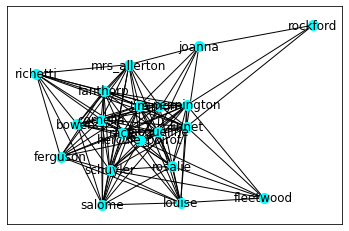

In [ ]:
nx.draw_networkx(G,with_labels=True, node_size=100,node_color='cyan')

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['bowers',
  'cornelia',
  'fanthorp',
  'ferguson',
  'hercule_poirot',
  'jacqueline',
  'joanna',
  'linnet',
  'louise',
  'mrs_allerton',
  'pennington',
  'race',
  'richetti',
  'rosalie',
  'salome',
  'schuyler',
  'simon',
  'tim'],
 ['fleetwood'],
 ['rockford']]

### *Louvian* method

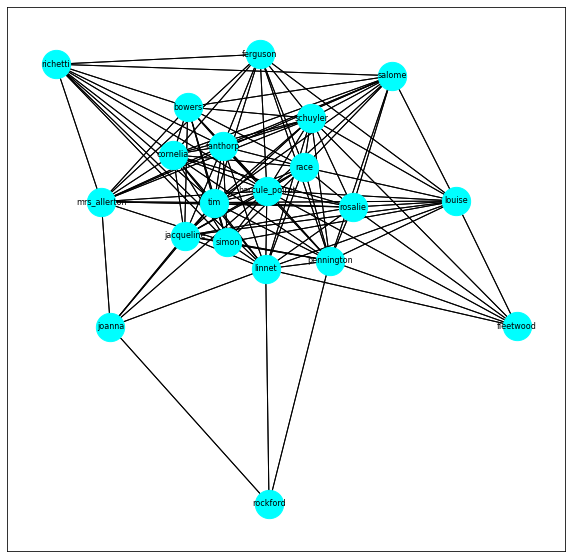

In [ ]:
plt.figure(3, figsize=(10,10))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="cyan")
nx.draw_networkx_edges(G, pos=pos)
plt.show()

In [ ]:
part = community_louvain.best_partition(G)
part

{'bowers': 2,
 'cornelia': 2,
 'fanthorp': 2,
 'ferguson': 2,
 'fleetwood': 1,
 'hercule_poirot': 0,
 'jacqueline': 1,
 'joanna': 0,
 'linnet': 1,
 'louise': 1,
 'mrs_allerton': 0,
 'pennington': 1,
 'race': 0,
 'richetti': 0,
 'rockford': 1,
 'rosalie': 0,
 'salome': 0,
 'schuyler': 2,
 'simon': 1,
 'tim': 0}

In [ ]:
communities = {}
for item in part.keys():
  if part[item] == 0:
    if 0 not in communities.keys():
      communities[0] = []
    communities[0].append(item)
  elif part[item] == 1:
    if 1 not in communities.keys():
      communities[1] = []
    communities[1].append(item)
  elif part[item] == 2:
    if 2 not in communities.keys():
      communities[2] = []
    communities[2].append(item)

In [ ]:
print('Community 1 :', communities[0])
print('Community 2 :', communities[1])
print('Community 3 :', communities[2])

Community 1 : ['hercule_poirot', 'race', 'salome', 'rosalie', 'mrs_allerton', 'tim', 'richetti', 'joanna']
Community 2 : ['jacqueline', 'linnet', 'simon', 'pennington', 'louise', 'fleetwood', 'rockford']
Community 3 : ['schuyler', 'ferguson', 'cornelia', 'bowers', 'fanthorp']


In [ ]:
community_louvain.modularity(part, G)

0.1753070262409941

In [ ]:
induced = community_louvain.induced_graph(part, G)
print(induced.nodes())
print(induced.edges())

[0, 1, 2]
[(0, 1), (0, 0), (0, 2), (1, 1), (1, 2), (2, 2)]


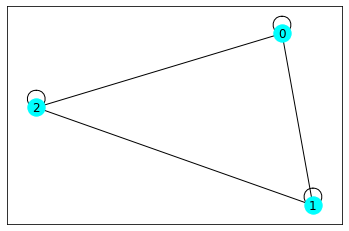

In [ ]:
nx.draw_networkx(induced,node_color='cyan')

In [ ]:
list(nx.find_cliques(G))

[['rockford', 'linnet', 'pennington'],
 ['rockford', 'linnet', 'joanna'],
 ['hercule_poirot',
  'fleetwood',
  'louise',
  'schuyler',
  'rosalie',
  'linnet',
  'pennington'],
 ['hercule_poirot',
  'tim',
  'louise',
  'pennington',
  'race',
  'schuyler',
  'rosalie',
  'jacqueline',
  'linnet'],
 ['hercule_poirot',
  'tim',
  'louise',
  'pennington',
  'race',
  'schuyler',
  'rosalie',
  'salome'],
 ['hercule_poirot',
  'tim',
  'louise',
  'pennington',
  'race',
  'schuyler',
  'ferguson'],
 ['hercule_poirot',
  'tim',
  'louise',
  'pennington',
  'race',
  'simon',
  'jacqueline',
  'linnet'],
 ['hercule_poirot',
  'tim',
  'cornelia',
  'rosalie',
  'schuyler',
  'mrs_allerton',
  'salome'],
 ['hercule_poirot',
  'tim',
  'cornelia',
  'rosalie',
  'schuyler',
  'pennington',
  'race',
  'jacqueline',
  'linnet'],
 ['hercule_poirot',
  'tim',
  'cornelia',
  'rosalie',
  'schuyler',
  'pennington',
  'race',
  'salome'],
 ['hercule_poirot',
  'tim',
  'cornelia',
  'fanthorp'

In [ ]:
from networkx.algorithms.community import k_clique_communities
c = list(k_clique_communities(G, 7))
print(c)

[frozenset({'louise', 'schuyler', 'jacqueline', 'mrs_allerton', 'fleetwood', 'rosalie', 'linnet', 'hercule_poirot', 'race', 'salome', 'tim', 'bowers', 'richetti', 'simon', 'pennington', 'cornelia', 'fanthorp', 'ferguson'})]


For k value varying from 2 to 7 the number of k clique communities obtained is 1. This aligns with the storyline as the story is set up in the cruise, all the charecters interact with each other forming single community.

## Task (e)

### Degree distribution

In [ ]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  20
Edges:  121
Average degree:  6.05


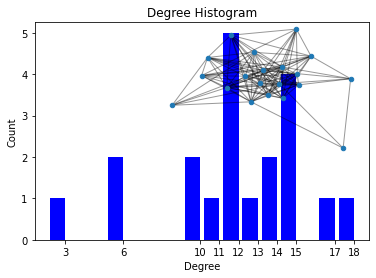

In [ ]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (G.subgraph(c) for c in nx.connected_components(G))
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

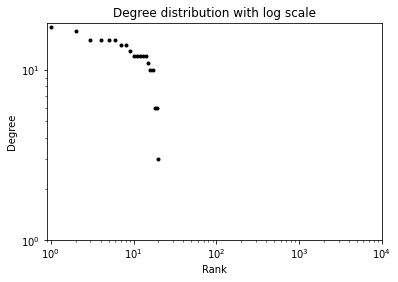

In [ ]:
########################################################################
# Degree distribution 
########################################################################

degrees = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)
plt.savefig("degree_distribution.png")

In [ ]:
print(nx.average_shortest_path_length(G))

1.368421052631579


In [ ]:
a = nx.is_connected(G)
s='\n Is a connected graph: ' +repr(a)
print (s)

no=len(list(nx.connected_components(G)))
s='\n no of connected components: ' +repr(no)
print (s)

#Gecum13ate a sorted list of connected components, largest first 
CoC=sorted(nx.connected_components(G), key = len, reverse=True)
for item in CoC:
    cclen=len(item)
    s= "\n Connected component length:" +repr(cclen)
    print (s)
    print ("\n Connected component :")
    print (item)


 Is a connected graph: True

 no of connected components: 1

 Connected component length:20

 Connected component :
{'schuyler', 'jacqueline', 'fleetwood', 'linnet', 'hercule_poirot', 'salome', 'bowers', 'richetti', 'pennington', 'louise', 'mrs_allerton', 'joanna', 'rosalie', 'race', 'ferguson', 'simon', 'rockford', 'cornelia', 'fanthorp', 'tim'}


In [ ]:
giant = max(nx.connected_components(G), key=len)

In [ ]:
giant

{'bowers',
 'cornelia',
 'fanthorp',
 'ferguson',
 'fleetwood',
 'hercule_poirot',
 'jacqueline',
 'joanna',
 'linnet',
 'louise',
 'mrs_allerton',
 'pennington',
 'race',
 'richetti',
 'rockford',
 'rosalie',
 'salome',
 'schuyler',
 'simon',
 'tim'}

In [ ]:
len(giant)

20

### Ego network

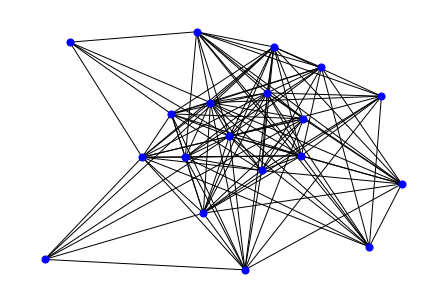

In [ ]:
s='hercule_poirot'
hub_ego=nx.ego_graph(G,s)

# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)

# Draw ego as large and red
plt.savefig('hercule.png')
plt.show()
nx.write_gml(hub_ego,"egonw_hercule.gml")

In [ ]:
no_node=len(hub_ego.nodes())
no_edges=len(hub_ego.edges())
print("hercule's Ego Network : nodes", no_node)
print("hercule's Ego Network : edges", no_edges)

hercule's Ego Network : nodes 19
hercule's Ego Network : edges 118


### Comparision with random graph model

In [ ]:
nodes=G.number_of_nodes()
nodes

20

In [ ]:
#calculate average degree to use with random graph models 
degree_list = list(nx.degree(G))
no_nodes=len(degree_list)
total_degree=0
for node in degree_list[:19]:
    print("Node ", node[0], " : Degree is ", node[1])
    total_degree=total_degree+ node[1]
avg_degree= total_degree/no_nodes
avg_degree

Node  hercule_poirot  : Degree is  18
Node  jacqueline  : Degree is  13
Node  linnet  : Degree is  15
Node  simon  : Degree is  12
Node  race  : Degree is  14
Node  pennington  : Degree is  15
Node  salome  : Degree is  12
Node  rosalie  : Degree is  12
Node  mrs_allerton  : Degree is  12
Node  tim  : Degree is  17
Node  schuyler  : Degree is  15
Node  ferguson  : Degree is  10
Node  richetti  : Degree is  10
Node  cornelia  : Degree is  15
Node  bowers  : Degree is  11
Node  louise  : Degree is  12
Node  fanthorp  : Degree is  14
Node  joanna  : Degree is  6
Node  fleetwood  : Degree is  6


11.95

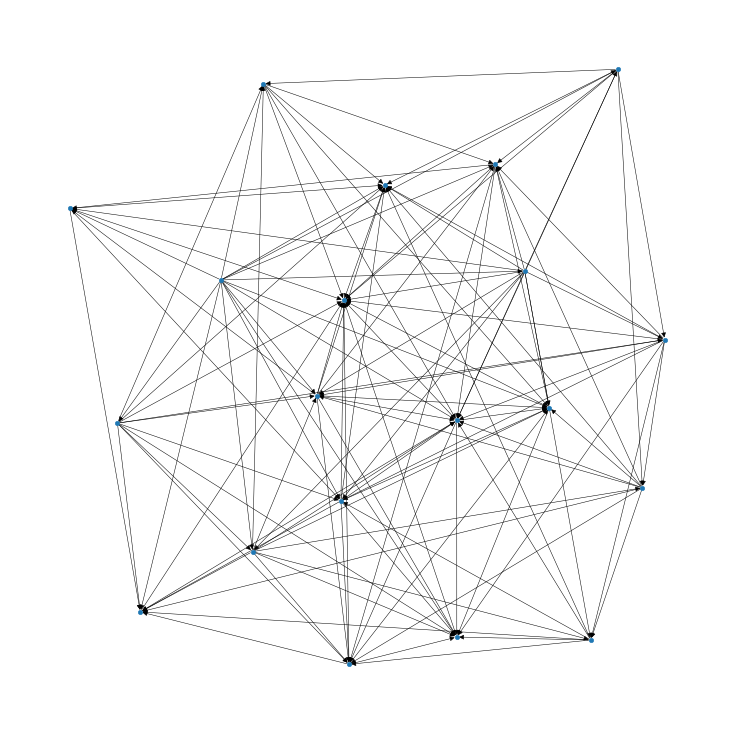

In [ ]:
p=avg_degree/(no_nodes-1)
#G2 = nx.erdos_renyi_graph(no_nodes,p)  # same call 
G2 = nx.gnp_random_graph(no_nodes,p)
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()


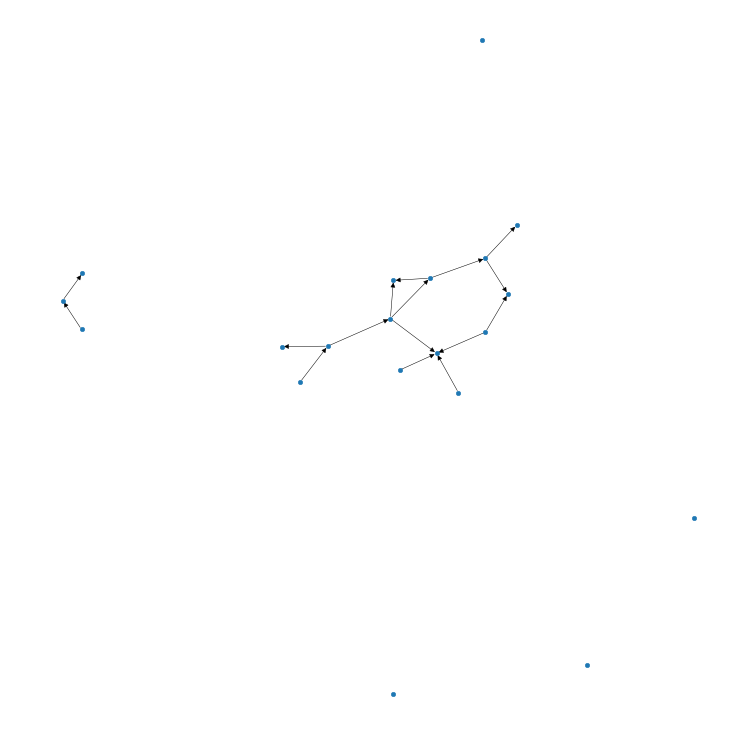

In [ ]:
#Make random graph 
G2 = nx.gnp_random_graph(no_nodes,0.1)
#assuming probability for node creation 0.1 
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()


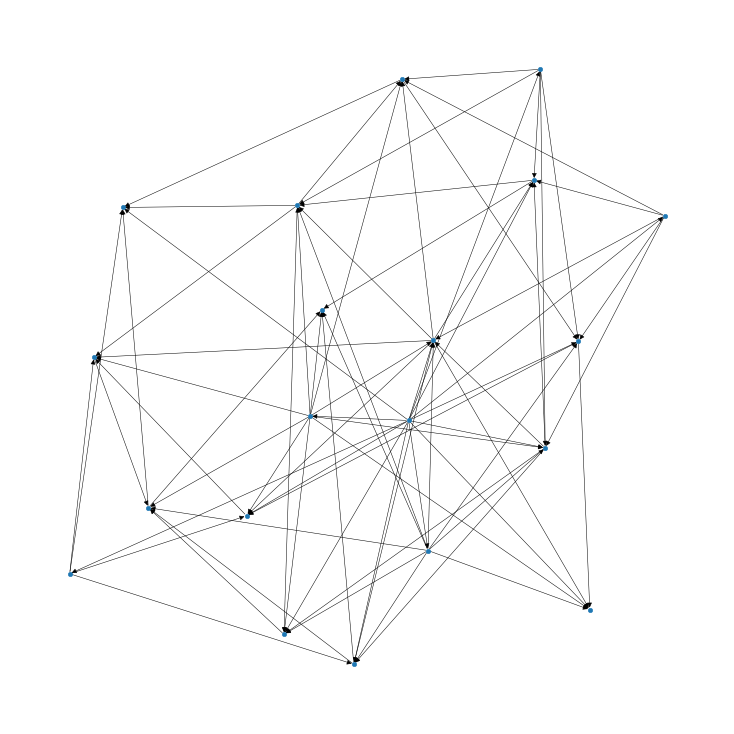

In [ ]:
neighbours=5
H = nx.barabasi_albert_graph(no_nodes,neighbours)
fig = plt.figure(figsize =(10 ,10))
nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

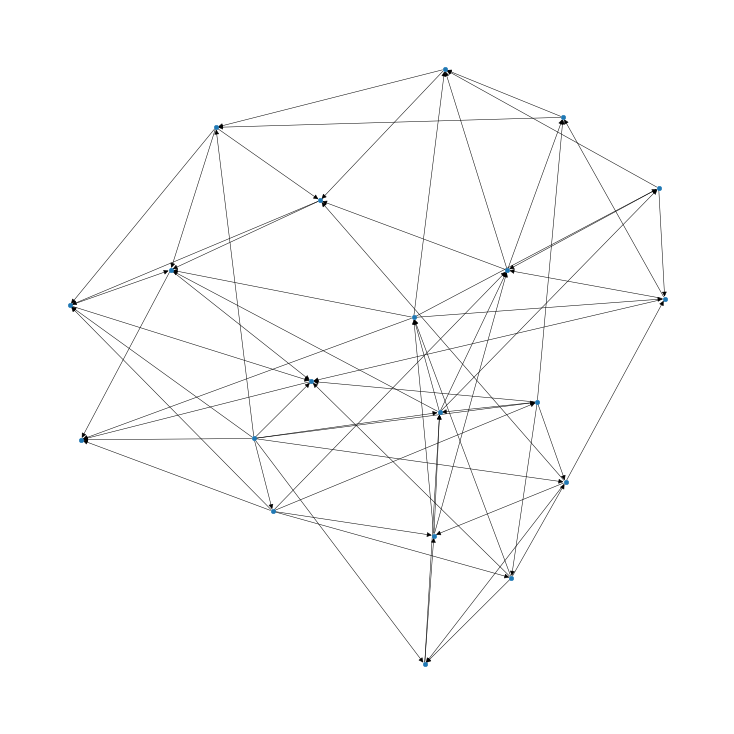

In [ ]:
H = nx.newman_watts_strogatz_graph(no_nodes,neighbours,p)
fig = plt.figure(figsize =(10 ,10))

nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

In [ ]:
characters=['hercule_poirot','jacqueline','linnet', 'simon', 'race', 'pennington', 'salome',
            'rosalie', 'mrs_allerton', 'tim', 'schuyler', 'ferguson', 'richetti', 'cornelia', 'bowers', 'louise', 'fanthorp', 'joanna', 'fleetwood','rockford']

## Analysis

### Finding protagonists

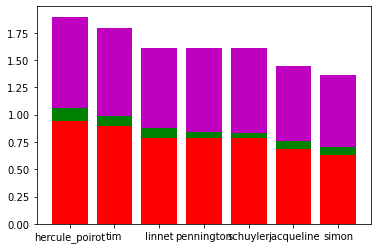

In [ ]:
import matplotlib.pyplot as plt
  
# create data
x=['hercule_poirot','tim','linnet','pennington','schuyler','jacqueline','simon']
y1=[0.947, 0.894, 0.789, 0.789, 0.789, 0.684, 0.631]
y2=[0.057, 0.037, 0.069, 0.061, 0.026, 0.018, 0.0103]
y3=[0.95, 0.90, 0.82, 0.82, 0.82, 0.76, 0.730]
y4=[0.111,0.098,0.089,0.051, 0.0437 , 0.079, 0.077]
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1, color='m')
plt.bar(x, y4, bottom=y1, color='g')

plt.show()

We took the main characters from the novel and plotted their centralities in the stacked bar chart as shown.
In the story the main characters are:
 <br />
 <br />Hercule Poirot is the detective, Linnet is the character who gets murdered, Simon and Jacqueline are the main antagonists, and Tim hatches a plan to steal Linenet's expensive pearls.
  <br />
 <br />From the graph we see that Hercule Poirot, Tim and Linnet are the top three which aligns with our story, and Simon and Jacqueline fall a little lower.  <br />This is expected as the protagonists are mentioned much more regularly that the antagonists



As all the centralities 

In [ ]:
#Applying shortest path to find the protagonist
import random
def plot_paths(G, paths):
    color=["red","orange","yellow"]
    plt.figure(figsize=(12,12))
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=1000, node_color='lime')
    nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in G})
    nx.draw_networkx_edges(G, pos=pos)
    for l1 in paths:
      for path in l1:
          edges = list(zip(path, path[1:]))
          nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color=color[random.randint(0,2)], width=3)
    ax = plt.gca()
    ax.set_axis_off()
    ax.grid(None)

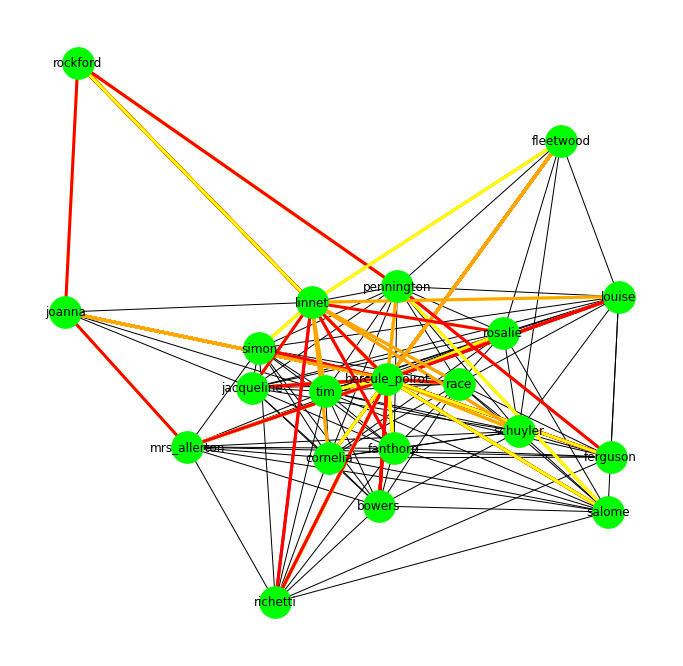

In [ ]:
target = 'simon'
char_list=[]
for i in range(20):
  for j in range (20):
    source = characters[i]
    target= characters[j]
    char_list.append(nx.shortest_path(G, source, target))
char_list=[[x] for x in char_list if len(x)>2]
plot_paths(G,char_list)

This graph shows the shortest path through between each character with path length greater than 1.
<br/>Through this analysis we can see that the node of Hercule Poirot is the busiest, making him the main protagonist, which is true according to the book.

Components in graph, graph extracted is a single component connected graph

What do the clustering coefficients, discovered communities, extracted ego network 
of protagonists and average shortest path tell you about the dynamics in the story ?

In [ ]:
nx.is_connected(G)

True

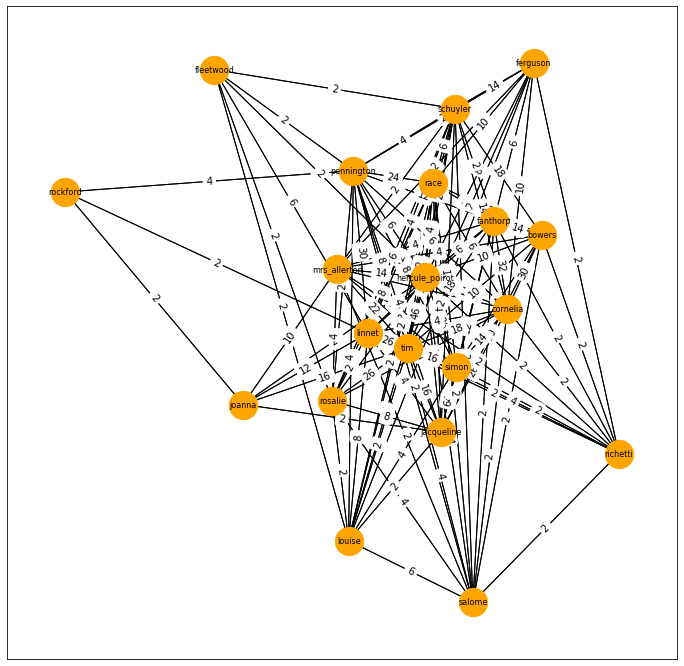

In [ ]:
plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="orange")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

Upon analysing we can see that the graph is a single component, connected graph and it makes sense because the whole sequence of story happened in a cruise where every character came across every other character. So the shortest path between all the characters is a maximum of 2.

### Dynamics of the story

#### From clustering coefficients

In [ ]:
print(nx.clustering(G, ['hercule_poirot']))
print(nx.clustering(G, ['simon']))
print(nx.clustering(G, ['linnet']))
print(nx.clustering(G, ['jacqueline']))

{'hercule_poirot': 0.6535947712418301}
{'simon': 0.7878787878787878}
{'linnet': 0.6190476190476191}
{'jacqueline': 0.7692307692307693}


The local clustering coefficient of Hercule Poirot is very low.
This suggests that he is a very influential and important character of the novel.
Linnet also has a very low clustering coefficient. This also aligns with story as 

#### Discovered Communities

In [ ]:
print('Community 1 :', communities[0])
print('Community 2 :', communities[1])
print('Community 3 :', communities[2])

Community 1 : ['hercule_poirot', 'race', 'salome', 'rosalie', 'mrs_allerton', 'tim', 'richetti', 'joanna']
Community 2 : ['jacqueline', 'linnet', 'simon', 'pennington', 'louise', 'fleetwood', 'rockford']
Community 3 : ['schuyler', 'ferguson', 'cornelia', 'bowers', 'fanthorp']


From the Lovian community, the following communities are generated:

Rosalie is Mrs Allerton's daughter. Tim is Rosalie's lover. Tim and Joanna plot a plan to steal Linnet's Pearl. So it makes sence for them to be in the same community.

Hercule Poirot and Race are in the same community. Since they are very close friends this aligns with the dynamics of the story.

Linnet and Simon are married to one another. Jacqueline is Linnet's close friend and Simon's lover. So according to the graph and the story, they have to be in the same community.
 

#### Average shortest path

In [ ]:
nx.average_shortest_path_length(G)

1.368421052631579

This shows that the characters chosen have a good amount of communication and the weights in the graph as we saw in the visualisation and it suggests that hercule had the most interaction which again supports that he is the protogonist in that novel.
Another reason for this is that Hercule Poirot in the book interviews every individual. Hence the shortest path between two people is atmost 2 hops.

#### Ego network of Protagonist

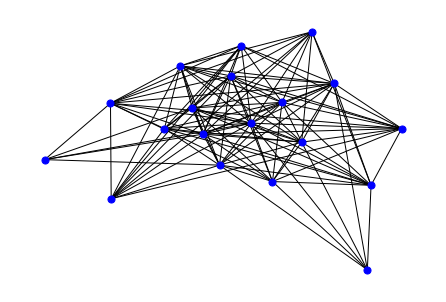

In [ ]:
s='hercule_poirot'
hub_ego=nx.ego_graph(G,s)

# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)

# Draw ego as large and red
plt.savefig('hercule.png')
plt.show()
nx.write_gml(hub_ego,"egonw_hercule.gml")

Centrality

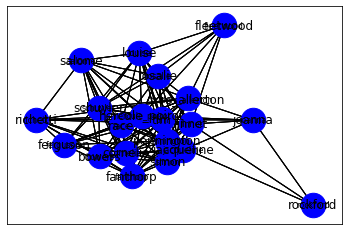

In [ ]:
pos = nx.spring_layout(G, seed=800)
nx.draw_networkx(G, pos, nx.degree_centrality(G), 'Degree Centrality')
nx.draw_networkx(G, pos=pos, node_size = 600, font_size=8, node_color="blue")
edges = nx.draw_networkx_edges(G, pos)

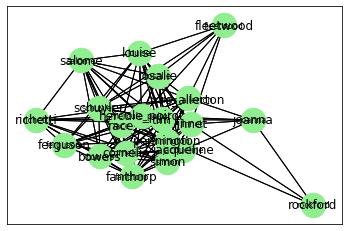

In [ ]:
nx.draw_networkx(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')
nx.draw_networkx(G, pos=pos, node_size = 600, font_size=8, node_color="lightgreen")

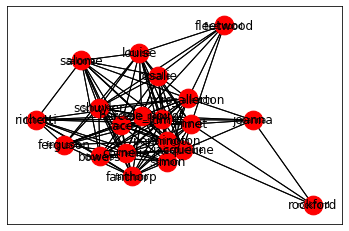

In [ ]:
nx.draw_networkx(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')
nx.draw_networkx(G, pos=pos, node_size = 350, font_size=8, node_color="red")

In [ ]:
def page_rank(G, d=0.85, tol=1e-2, max_iter=100):
    
    nodes = G.nodes()
    matrix = nx.adjacency_matrix(G, nodelist=nodes)
    out_degree = matrix.sum(axis=0)
    weight = matrix / out_degree
    N = G.number_of_nodes()
    pr = np.ones(N).reshape(N, 1) * 1./N

    # need to repeat the initial step twice
    # for matplotlib animation
    yield nodes, pr, "init"
    yield nodes, pr, "init"

    for it in range(max_iter):
        old_pr = pr[:]
        pr = d * weight.dot(pr) + (1-d)/N
        yield nodes, pr, it
        err = np.absolute(pr - old_pr).sum()
        if err < tol:
            return pr

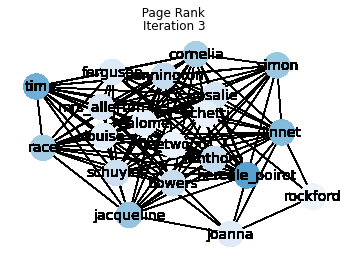

In [ ]:
from matplotlib.animation import FuncAnimation
def update(r):
    res_nodes, res_values, it = r
    res_values = np.asarray(res_values).ravel()
    plt_nodes = nx.draw_networkx_nodes(
        G, pos,
        ax=ax,
        nodelist=res_nodes,
        node_color=res_values,
        alpha=1,
        node_size=600,
        cmap=plt.cm.Blues,
        vmin=0,
        vmax=0.2
    )
    ax.axis("off")
    ax.set_title(f"Iteration {it}")
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, font_size=14)
    return [plt_nodes, ]




pos = nx.kamada_kawai_layout(G)

f, ax = plt.subplots()
ani = FuncAnimation(
    f,
    update,
    frames=page_rank(G),
    interval=1000,
    blit=True
)
f.suptitle(f"  Page Rank")
ani.save("graph_pr.gif", writer='pillow')

### Comparison of different graph models v/s our social graph

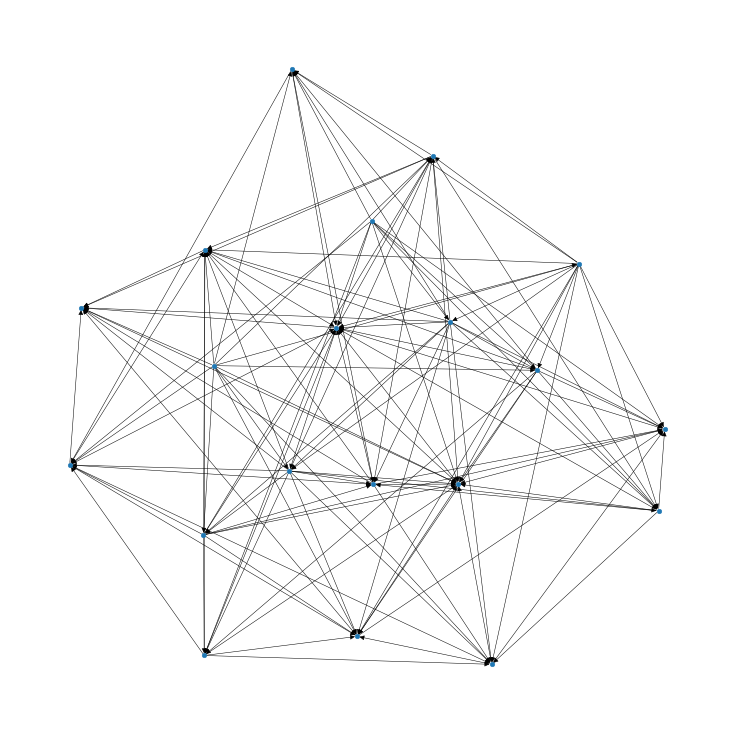

In [ ]:
p=avg_degree/(no_nodes-1)
#G2 = nx.erdos_renyi_graph(no_nodes,p)  # same call 
G2 = nx.gnp_random_graph(no_nodes,p,seed = 12)
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 21, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

In [ ]:
print("Number of connected components in graph : ",nx.number_connected_components(G2))
print("Number of edges : ",nx.number_of_edges(G2))

Number of connected components in graph :  7
Number of edges :  13


The random generated graph has 1 component -- similar to our social graph.

The average shortest path is a decent approximation of our social graph.

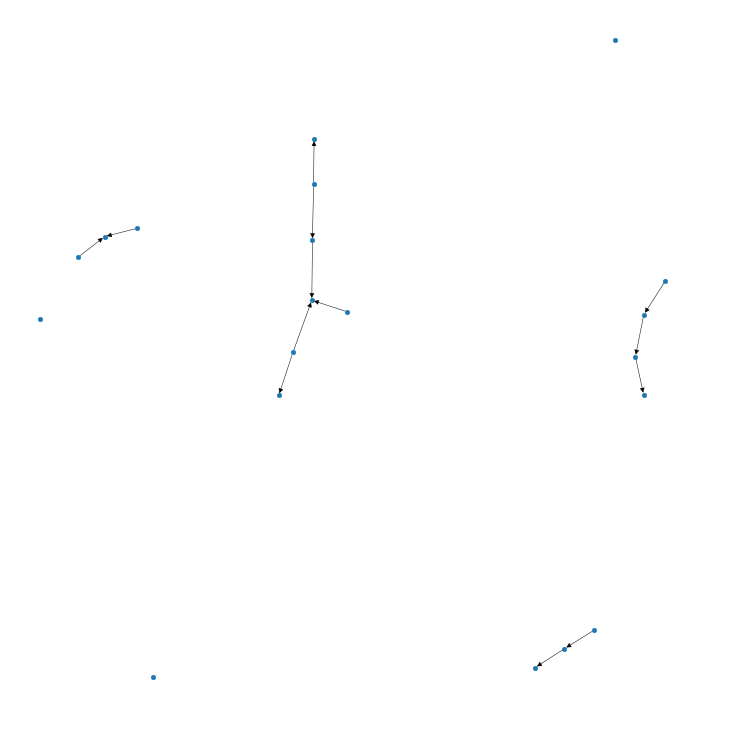

In [ ]:
#Make random graph 
G2 = nx.gnp_random_graph(no_nodes,0.1)
#assuming probability for node creation 0.1 
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 21, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

In [ ]:
print("Number of connected components in graph : ",nx.number_connected_components(G2))
print("Number of edges : ",nx.number_of_edges(G2))

Number of connected components in graph :  7
Number of edges :  13


Here there are 7 connected components, this does not simulate the social graph we obtained.

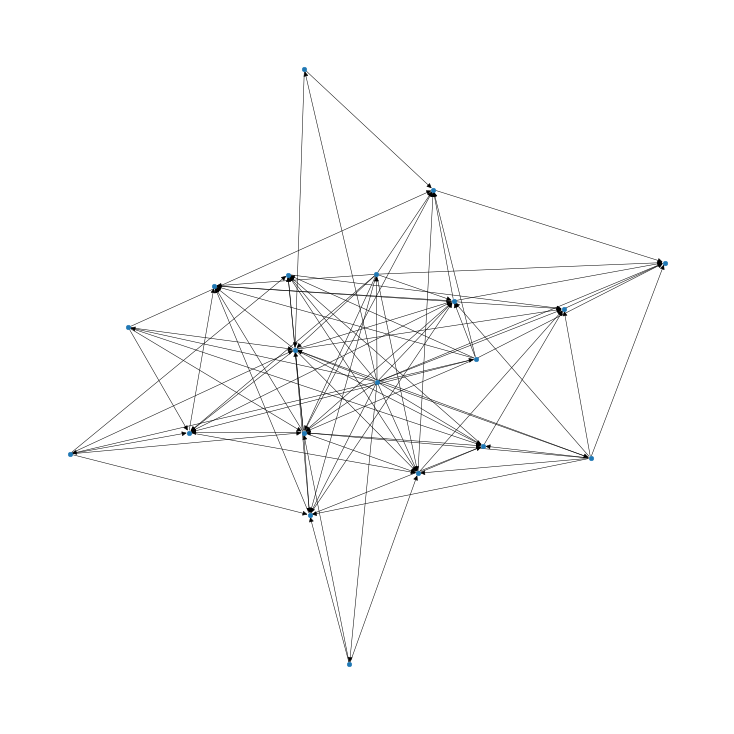

In [ ]:
neighbours=7
H = nx.barabasi_albert_graph(no_nodes,neighbours, seed=42)
fig = plt.figure(figsize =(10 ,10))
nx.draw(H, with_labels = False, node_size = 21, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()


Taking neighbours as 7, the connected components and average shortest paths, we get a good approximation of our social graph.

Decreasing neighbours seems to increase the average shortest path - as expected. 

In [ ]:
print("Number of connected components in graph : ",nx.number_connected_components(H))
print("Number of edges : ",nx.number_of_edges(H))
print("Average Shortest Path Length : ",nx.average_shortest_path_length(H))

Number of connected components in graph :  1
Number of edges :  91
Average Shortest Path Length :  1.5210526315789474


The random generated graph has 1 component component similar to our social graph.

The average shortest path from the random graph is close to the value in our social graph. Therefore, the generated graph is a good approximation.

### Visualizing communities

#### K-clique

Note: Remove this part

In [ ]:
for i in range(2,8):
  c = list(k_clique_communities(G, 7))
  if len(c)>1:
    print("More than one clique found")
    break
print("Only one clique found for k ranging from 2-7")

Only one clique found for k ranging from 2-7


The above piece of code checks for cliques ranging from k values of 2 to 7.
As seen from the output there exists only one clique. 
This aligns with the storyline as all the characters interact with each other as the entire novel takes place in a cruise ship, making the shortest path betweek an two characters a mazimun of two if not one